In [ ]:
import cv2 

img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

: 

# Convolutional Neural Networks

# Importar Librerías

In [43]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [44]:
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [46]:
dirname = os.path.join(os.getcwd(),'cnn_flores/')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Inteligencia Artificial\cnn_flores/\
c:\Inteligencia Artificial\cnn_flores/\Daisy 1
c:\Inteligencia Artificial\cnn_flores/\Dandelion 12028
c:\Inteligencia Artificial\cnn_flores/\Roses 18507
c:\Inteligencia Artificial\cnn_flores/\Sunflower 12276
c:\Inteligencia Artificial\cnn_flores/\Tulip 14074
Directorios leidos: 5
Imagenes en cada directorio [12029, 18507, 12276, 14074, 11407]
suma Total de imagenes en subdirs: 68293


# Creamos las etiquetas

In [47]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  68293


In [48]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 Daisy
1 Dandelion
2 Roses
3 Sunflower
4 Tulip


In [83]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [84]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1, 68293]

Text(0.5, 1.0, 'Ground Truth : 1')

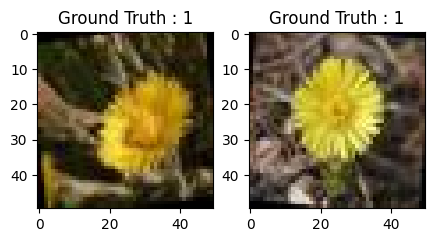

In [51]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

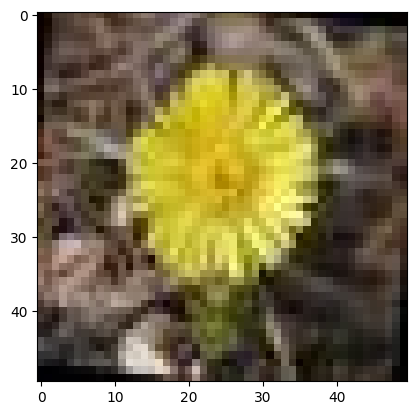

In [52]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# Normalizar las imágenes dividiendo por 255.0, pero utilizando 'float16'
train_X = train_X / 255.0
test_X = test_X / 255.0

# Mostrar la imagen
plt.imshow(test_X[0, :, :])

## Hacemos el One-hot Encoding para la red

In [53]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [81]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

ValueError: Found input variables with inconsistent numbers of samples: [43707, 54634]

In [55]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(43707, 50, 50, 3) (10927, 50, 50, 3) (43707, 5) (10927, 5)


# Creamos el modelo de CNN

In [64]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 100 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [65]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(50,50,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))


sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [66]:
sport_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 32)        0         
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 32)                640032    
                                                        

In [67]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [68]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100
683/683 [==============================] - 64s 92ms/step - loss: 1.4431 - accuracy: 0.3817 - val_loss: 1.1915 - val_accuracy: 0.6144
Epoch 2/100
683/683 [==============================] - 59s 86ms/step - loss: 1.1810 - accuracy: 0.5324 - val_loss: 1.0059 - val_accuracy: 0.6521
Epoch 3/100
683/683 [==============================] - 60s 88ms/step - loss: 1.0696 - accuracy: 0.5874 - val_loss: 0.9177 - val_accuracy: 0.6780
Epoch 4/100
683/683 [==============================] - 64s 94ms/step - loss: 1.0134 - accuracy: 0.6154 - val_loss: 0.8712 - val_accuracy: 0.7012
Epoch 5/100
683/683 [==============================] - 68s 100ms/step - loss: 0.9802 - accuracy: 0.6331 - val_loss: 0.8469 - val_accuracy: 0.7087
Epoch 6/100
683/683 [==============================] - 63s 92ms/step - loss: 0.9467 - accuracy: 0.6488 - val_loss: 0.8204 - val_accuracy: 0.7217
Epoch 7/100
683/683 [==============================] - 62s 91ms/step - loss: 0.9263 - accuracy: 0.6562 - val_loss: 0.8040 - val_a

In [74]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("flores.h5")

# Evaluamos la red

In [96]:

modelo_entrenado = load_model('flores.h5')
# test_eval = modelo_entrenado.evaluate(test_X, test_Y_one_hot, verbose=1)

In [72]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3395827114582062
Test accuracy: 0.8875466585159302


In [73]:
flower_train = modelo_entrenado.history.history

AttributeError: 'NoneType' object has no attribute 'history'

In [42]:

# Obtener información del historial
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))

# Gráficos de precisión
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Gráficos de pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Epoch 1/100
 40/683 [>.............................] - ETA: 1:24 - loss: 0.4841 - accuracy: 0.8176

KeyboardInterrupt: 

In [74]:
predicted_classes2 = sport_model.predict(test_X)

783/783 [==============================] - 18s 21ms/step


In [25]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

NameError: name 'predicted_classes2' is not defined

In [29]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

ValueError: operands could not be broadcast together with shapes (13659,) (0,) 

Found 3010 incorrect labels


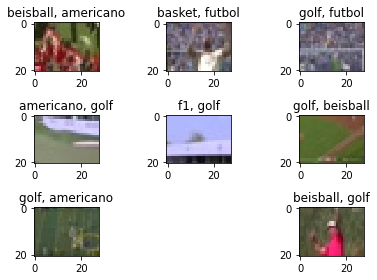

In [31]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [4]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

NameError: name 'nClasses' is not defined

In [124]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['C:/Users/Daniel/Pictures/tulip-4.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (50, 50),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = modelo_entrenado.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 [==============================] - 0s 28ms/step
C:/Users/Daniel/Pictures/tulip-4.jpg Tulip
